In [ ]:
import requests
import pandas as pd
import numpy as np



In [ ]:
category = 'accommodation'
def get_place(loc):
  # Define the parameters for the search query
  url = f'http://tour-pedia.org/api/getPlaces?location={loc}&category={category}'

  # Make the HTTP GET request to retrieve the places
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      places = response.json()  # Extract JSON data from the response
      # Convert the JSON data into a DataFrame
      df_places = pd.DataFrame(places)

      # Save the DataFrame to a CSV file
      csv_file_path = f'{category}_{loc}.csv'
      df_places.to_csv(csv_file_path, index=False)

      print(f"CSV file saved as {csv_file_path}")
  else:
      print(f"Failed to retrieve data. Status code: {response.status_code}")


In [ ]:

# Load the original CSV file with the 'reviews' column
def extract_reviews(destination):
  csv_file_path = f'{category}_{destination}.csv'
  df_places = pd.read_csv(csv_file_path)

  # Filter out rows where the 'reviews' column is null or missing
  df_places_non_null = df_places.dropna(subset=['reviews'])

  # List to store the fetched review data
  all_reviews = []

  # Generate a list of random, unique indices only from rows with valid 'reviews' URLs
  random_indices = np.random.choice(df_places_non_null.index, size=100, replace=False)

  # Loop over each randomly chosen index
  for num in random_indices:
      review_url = df_places_non_null.loc[num]['reviews']  # Extract the review URL from the 'reviews' column

      # Make the API request to get the reviews
      try:
          response = requests.get(review_url)
          if response.status_code == 200:
              reviews_data = response.json()  # Extract the JSON response
              # Loop through each review and extract the required fields
              for review in reviews_data:
                  all_reviews.append({
                      'id': df_places_non_null.loc[num]['id'],
                      'name': df_places_non_null.loc[num]['name'],
                      'lat': df_places_non_null.loc[num]['lat'],
                      'lng': df_places_non_null.loc[num]['lng'],
                      'subCategory': df_places_non_null.loc[num]['subCategory'],
                      'location': df_places_non_null.loc[num]['location'],
                      'language': review.get('language'),
                      'polarity': review.get('polarity'),
                      'rating': review.get('rating'),
                      'source': review.get('source'),
                      'text': review.get('text'),
                      'time': review.get('time'),
                      'wordsCount': review.get('wordsCount'),
                      'details': review.get('details')
                  })
          else:
              print(f"Failed to retrieve reviews for {review_url}. Status code: {response.status_code}")
      except Exception as e:
          print(f"Error occurred: {e}")

  # Convert the list of reviews to a DataFrame
  df_reviews = pd.DataFrame(all_reviews)

  # Save the reviews to a new CSV file
  new_csv_file_path = f'{destination}_reviews_{category}.csv'
  df_reviews.to_csv(new_csv_file_path, index=False)


In [ ]:
destinations = ['Amsterdam', 'Barcelona', 'Berlin', 'Dubai', 'London', 'Paris', 'Rome', 'Tuscany']
for a in destinations:
  get_place(a)
  extract_reviews(a)

CSV file saved as accommodation_Amsterdam.csv
CSV file saved as accommodation_Barcelona.csv
CSV file saved as accommodation_Berlin.csv
CSV file saved as accommodation_Dubai.csv
CSV file saved as accommodation_London.csv
CSV file saved as accommodation_Paris.csv
CSV file saved as accommodation_Rome.csv
CSV file saved as accommodation_Tuscany.csv


In [ ]:
import pandas as pd
import os

# List of CSV files to combine
csv_files = [f'{x}_reviews_{category}.csv' for x in destinations]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    if os.path.exists(file):  # Check if the file exists
        df = pd.read_csv(file)  # Read the CSV into a DataFrame
        dataframes.append(df)  # Append the DataFrame to the list
    else:
        print(f"{file} does not exist.")

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_file = 'combined_places.csv'
combined_df.to_csv(combined_csv_file, index=False)

print(f"All files combined and saved to {combined_csv_file}")


All files combined and saved to combined_places.csv


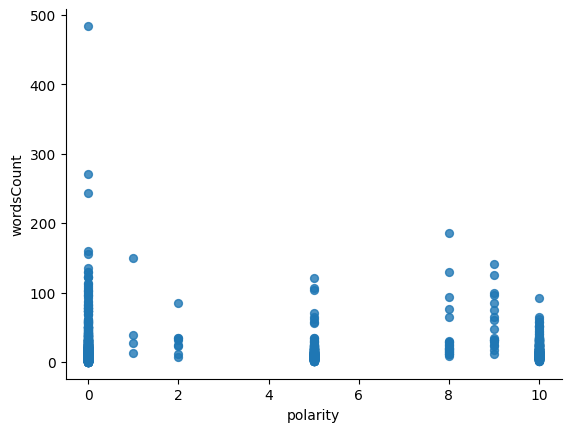

In [ ]:

# @title polarity vs wordsCount

from matplotlib import pyplot as plt
df_reviews.plot(kind='scatter', x='polarity', y='wordsCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

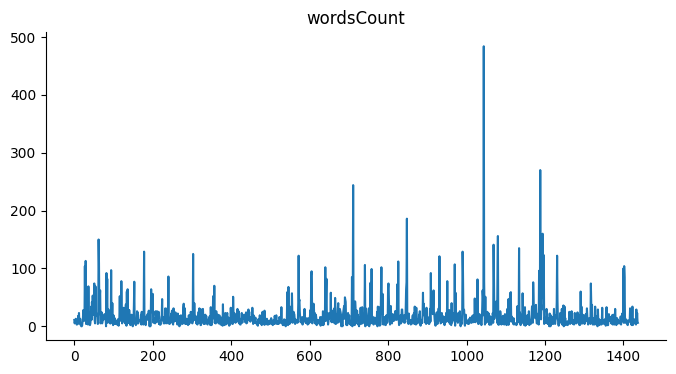

In [ ]:
# @title wordsCount

from matplotlib import pyplot as plt
df_reviews['wordsCount'].plot(kind='line', figsize=(8, 4), title='wordsCount')
plt.gca().spines[['top', 'right']].set_visible(False)

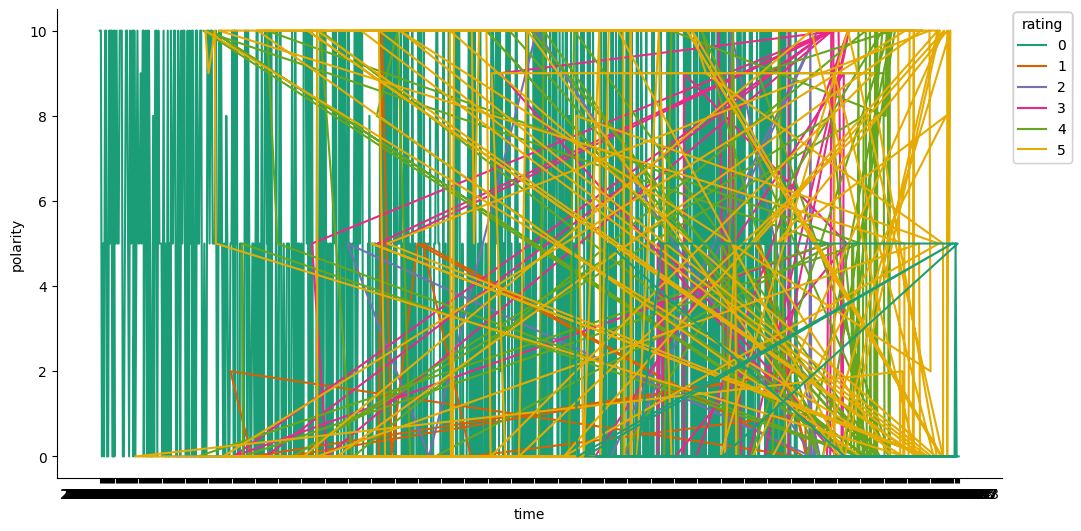

In [ ]:
# @title time vs polarity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['polarity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_reviews.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('polarity')

In [ ]:
from google.colab import sheets
a = pd.read_csv('EVERYTHING_with_category.csv')
sheet = sheets.InteractiveSheet(df=a)

https://docs.google.com/spreadsheets/d/1r9Kvor3FiHB06hb-vF7lqXDafEcb82O69B10KDjcT94#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
a.head()

NameError: name 'a' is not defined

In [ ]:
import pandas as pd
import os

# List of CSV files to combine with their respective categories
csv_files = [
    ('Restaurants.csv', 'Restaurant'),
    ('POI.csv', 'POI'),
    ('Attractions.csv', 'Attraction'),
    ('Accomodations.csv', 'Accommodation')
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file, category in csv_files:
    if os.path.exists(file):  # Check if the file exists
        df = pd.read_csv(file)  # Read the CSV into a DataFrame
        df['Category'] = category  # Add a new column for the category
        dataframes.append(df)  # Append the DataFrame to the list
    else:
        print(f"{file} does not exist.")

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_file = 'EVERYTHING_with_category.csv'
combined_df.to_csv(combined_csv_file, index=False)

print(f"All files combined with categories and saved to {combined_csv_file}")


All files combined with categories and saved to EVERYTHING_with_category.csv


In [ ]:
# Define the parameters for the search query
url = f'http://tour-pedia.org/api/getPlaces?category=restaurant'

# Make the HTTP GET request to retrieve the places
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    places = response.json()  # Extract JSON data from the response
    # Convert the JSON data into a DataFrame
    df_places = pd.DataFrame(places)

    # Save the DataFrame to a CSV file
    csv_file_path = f'places.csv'
    df_places.to_csv(csv_file_path, index=False)

    print(f"CSV file saved as {csv_file_path}")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

CSV file saved as places.csv


In [ ]:
places = pd.read_csv(csv_file_path)


In [ ]:
places_clean = places.dropna(subset=['polarity'])
places_clean = places.dropna(subset=['numReviews'])
len(places_clean)

64727

In [ ]:
from sklearn.cluster import KMeans

places_amsterdam = places_clean[places_clean['location'] == 'Amsterdam']

# Get the coordinates for clustering
coords = places_amsterdam[['lat', 'lng']]

# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit and predict clusters, and store the result in the original dataframe
places_amsterdam.loc[:, 'cluster'] = kmeans.fit_predict(coords)

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the average coordinates
center_lat = places_amsterdam['lat'].mean()
center_lng = places_amsterdam['lng'].mean()
map_clusters = folium.Map(location=[center_lat, center_lng], zoom_start=12)

# Create a marker cluster object
marker_cluster = MarkerCluster().add_to(map_clusters)

# Add points to the map
for _, row in places_amsterdam.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Place: {row['name']}<br>Cluster: {row['cluster']}",
        icon=folium.Icon(color=f"blue" if row['cluster'] == 0 else "green" if row['cluster'] == 1 else "red")
    ).add_to(marker_cluster)

# Display the map
map_clusters


<ipython-input-125-9e387c910792>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places_amsterdam['cluster'] = kmeans_amsterdam.fit_predict(coords_amsterdam)


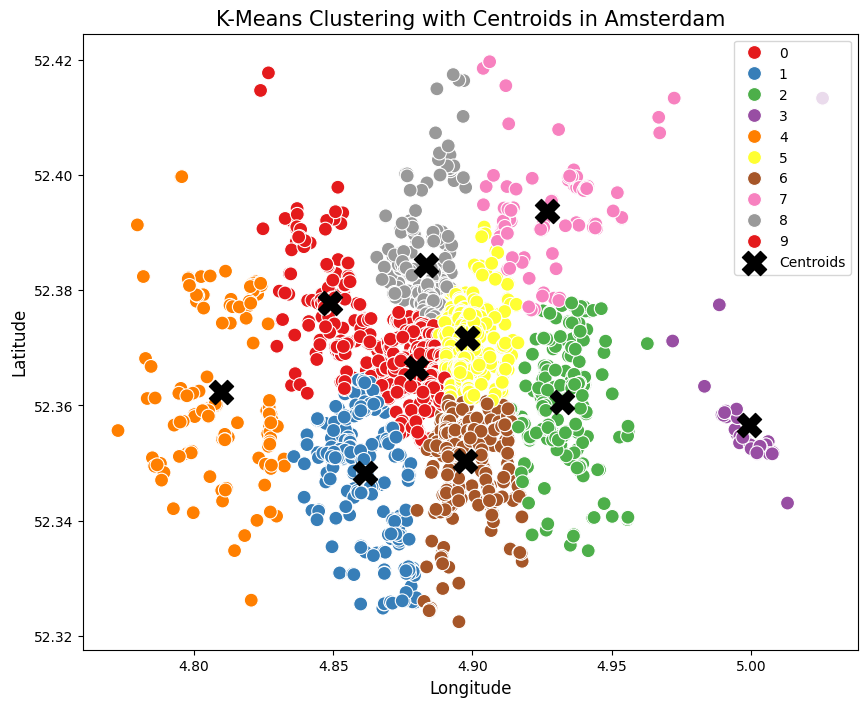

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Filter the places where the location is 'Amsterdam'
places_amsterdam = places_clean[places_clean['location'] == 'Amsterdam']

# Coordinates for clustering in Amsterdam
coords_amsterdam = places_amsterdam[['lat', 'lng']]

# Initialize and fit KMeans model for Amsterdam data
kmeans_amsterdam = KMeans(n_clusters=10)
places_amsterdam['cluster'] = kmeans_amsterdam.fit_predict(coords_amsterdam)

# Get the cluster centroids for Amsterdam
centroids_amsterdam = kmeans_amsterdam.cluster_centers_

# Plotting the clusters for Amsterdam
plt.figure(figsize=(10, 8))

# Plot the data points for Amsterdam, colored by cluster
sns.scatterplot(
    x='lng',
    y='lat',
    hue='cluster',
    palette='Set1',
    data=places_amsterdam,
    s=100,  # size of the points
    legend='full'
)

# Plot the centroids for Amsterdam clusters
plt.scatter(centroids_amsterdam[:, 1], centroids_amsterdam[:, 0], s=300, c='black', marker='X', label='Centroids')

# Set title and labels
plt.title("K-Means Clustering with Centroids in Amsterdam", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
import geopandas as gpd
from esda.moran import Moran
from libpysal.weights import DistanceBand

# Create a GeoDataFrame with latitude and longitude
places_geo = gpd.GeoDataFrame(places_amsterdam, geometry=gpd.points_from_xy(places_amsterdam.lng, places_amsterdam.lat))

# Create spatial weights matrix based on distance
w = DistanceBand.from_dataframe(places_geo, threshold=0.01)  # Set the threshold as per your distance scale

# Compute Moran’s I for the polarity column
moran = Moran(places_amsterdam['polarity'], w)

# Display Moran's I result
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")


/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
 There are 5 islands with ids: 22742, 23234, 111132, 111788, 126216.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
 There are 5 islands with ids: 22742, 23234, 111132, 111788, 126216.
  W.__init__(


('WARNING: ', 22742, ' is an island (no neighbors)')
('WARNING: ', 23234, ' is an island (no neighbors)')
('WARNING: ', 111132, ' is an island (no neighbors)')
('WARNING: ', 111788, ' is an island (no neighbors)')
('WARNING: ', 126216, ' is an island (no neighbors)')
Moran's I: 0.012516482912615721, p-value: 0.003


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Create a matrix of coordinates
coords = places_clean[['lat', 'lng']]

# Fit the KNN model (let's use 5 nearest neighbors as an example)
knn = NearestNeighbors(n_neighbors=5, radius=0.5)
knn.fit(coords)

# Find the neighbors for each restaurant
distances, indices = knn.kneighbors(coords)

# Calculate the weighted average polarity of neighbors
weights = 1 / (distances + 0.0001)  # Use reciprocal of distance as weights
weighted_avg_polarity = np.array([
    np.average(places_clean.iloc[indices[i]]['polarity'], weights=weights[i])
    for i in range(len(places_clean))
])

# Add the weighted average to the dataframe
places_clean['weighted_avg_polarity'] = weighted_avg_polarity

# Compare actual polarity to neighborhood weighted average
places_clean['polarity_diff'] = places_clean['polarity'] - places_clean['weighted_avg_polarity']

# Display rows with large differences (e.g., restaurants with a strong effect on neighbors)
places_clean[places_clean['polarity_diff'].abs() > 1.5]


<ipython-input-130-2315cc3cc2ee>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places_clean['weighted_avg_polarity'] = weighted_avg_polarity
<ipython-input-130-2315cc3cc2ee>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  places_clean['polarity_diff'] = places_clean['polarity'] - places_clean['weighted_avg_polarity']


id                                              name  \
12582   128742  RUSSO'S NEW YORK PIZZARIA روسو'س نيويور پيتزاريا   
21257     1223         Antica Osteria L'Incannucciata Restaurant   
21258     1317                                      Core de Roma   
21271     2470                                       Ponte Mollo   
21295     4373                                        Monte Arci   
...        ...                                               ...   
158235   27604                                         Café Cuba   
158282   93422                                         Zia Maria   
158292  131309                                     Cañas y Tapas   
158296  166777                                           Barraca   
158304   40311                                  Angus Steakhouse   

                                                  address    category  \
12582                          Jumeirah Center مركز جميرا  restaurant   
21257               Via della Giustiniana, 5, Rome, Italy  restaurant   
21258                      Via Vetulonia, 27, Rome, Italy  restaurant   
21271                                                 NaN  restaurant   
21295                  Via Castelfidardo, 33, Rome, Italy  restaurant   
...                                                   ...         ...   
158235               Nieuwmarkt 3, Amsterdam, Netherlands  restaurant   
158282                    Pappelalle 32A, Berlin, Germany  restaurant   
158292             Avinguda Diagonal, 3, Barcelona, Spain  restaurant   
158296  Passeig Marítim de la Barceloneta, 1, Barcelon...  restaurant   
158304      21-22 Coventry Street, London, United Kingdom  restaurant   

         location        lat        lng  \
12582       Dubai  25.230913  55.262792   
21257        Rome  42.001837  12.490895   
21258        Rome  41.876148  12.505977   
21271        Rome  41.937043  12.466947   
21295        Rome  41.906458  12.500887   
...           ...        ...        ...   
158235  Amsterdam  52.372670   4.901032   
158282     Berlin  52.545784  13.417636   
158292  Barcelona  41.410750   2.217616   
158296  Barcelona  41.379108   2.191973   
158304     London  51.510114  -0.132899   

                                                  details  \
12582   http://tour-pedia.org/api/getPlaceDetails?id=1...   
21257   http://tour-pedia.org/api/getPlaceDetails?id=1223   
21258   http://tour-pedia.org/api/getPlaceDetails?id=1317   
21271   http://tour-pedia.org/api/getPlaceDetails?id=2470   
21295   http://tour-pedia.org/api/getPlaceDetails?id=4373   
...                                                   ...   
158235  http://tour-pedia.org/api/getPlaceDetails?id=2...   
158282  http://tour-pedia.org/api/getPlaceDetails?id=9...   
158292  http://tour-pedia.org/api/getPlaceDetails?id=1...   
158296  http://tour-pedia.org/api/getPlaceDetails?id=1...   
158304  http://tour-pedia.org/api/getPlaceDetails?id=4...   

                      originalId  polarity  subCategory  numReviews  \
12582   52398361498e98a5504cd29a       5.0  Pizza Place         1.0   
21257                        NaN      10.0          NaN         2.0   
21258                        NaN       8.0          NaN         5.0   
21271                        NaN      10.0          NaN         1.0   
21295                        NaN       2.0          NaN         6.0   
...                          ...       ...          ...         ...   
158235                       NaN       5.0          NaN        28.0   
158282                       NaN       5.0          NaN        29.0   
158292                       NaN       7.0          NaN        31.0   
158296                       NaN       4.0          NaN        31.0   
158304                       NaN       5.0          NaN        46.0   

                                                  reviews  cluster  \
12582   http://tour-pedia.org/api/getReviewsByPlaceId?...        1   
21257   http://tour-pedia.org/api/getReviewsByPlaceId?...        2   
21258

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
csv_file_path = 'out_wit_tra.csv'
df = pd.read_csv(csv_file_path)

# Apply TextBlob sentiment analysis to the 'text' column
df['review_sentiment'] = df['tr'].apply(lambda text: TextBlob(text).sentiment.polarity if pd.notnull(text) else None)

# Optionally, if you have an existing polarity column in the dataset and want to compare:
df['sentiment_vs_polarity'] = df.apply(lambda row: row['review_sentiment']*10 - row['polarity'], axis=1)

# Display the results (show first few rows)
print(df[['tr', 'review_sentiment', 'polarity', 'sentiment_vs_polarity']].head())

# Save the results to a new CSV file
df.to_csv('EVERYTHING_with_sentiment.csv', index=False)

print(f"Sentiment analysis completed and saved to 'EVERYTHING_with_sentiment.csv'")


                                                  tr  review_sentiment  \
0                   It's a delicious steigerburger!!              1.00   
1  Top tent.. 10 minutes, nobody was at the table...              0.25   
2   Please be advised by the hostess at menu choice.              0.00   
3                              Eat, drink, and swim!              0.00   
4  Just wonderfull.... great place to hang out, c...              0.90   

   polarity  sentiment_vs_polarity  
0        10                    0.0  
1        10                   -7.5  
2         5                   -5.0  
3        10                  -10.0  
4        10                   -1.0  
Sentiment analysis completed and saved to 'EVERYTHING_with_sentiment.csv'


In [ ]:
df.head()

Unnamed: 0     id      name        lat       lng subCategory   location  \
0           0  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam   
1           1  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam   
2           2  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam   
3           3  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam   
4           4  28044  Steiger1  52.369762  4.936941         NaN  Amsterdam   

  language  polarity  rating        source  \
0       nl        10     0.0    Foursquare   
1       nl        10     0.0    Foursquare   
2       nl         5     0.0    Foursquare   
3       nl        10     0.0    Foursquare   
4       en        10     5.0  GooglePlaces   

                                                text        time  wordsCount  \
0                          Heerlijke steigerburger!!  2013-07-18           2   
1  Top tent .. 10 minuten gezeten niemand ad tafe...  2013-07-11          20   
2  Laat je adviseren door gastvrouw/-heer bij men...  2013-04-25           8   
3                         eten, drinken en aanmeren!  2012-07-15           4   
4  Just wonderfull.... great place to hang out, c...  2012-08-03          19   

                                             details  \
0  http://tour-pedia.org/api/getReviewDetails?id=...   
1  http://tour-pedia.org/api/getReviewDetails?id=...   
2  http://tour-pedia.org/api/getReviewDetails?id=...   
3  http://tour-pedia.org/api/getReviewDetails?id=...   
4  http://tour-pedia.org/api/getReviewDetails?id=...   

                                                  tr  review_sentiment  \
0                   It's a delicious steigerburger!!              1.00   
1  Top tent.. 10 minutes, nobody was at the table...              0.25   
2   Please be advised by the hostess at menu choice.              0.00   
3                              Eat, drink, and swim!              0.00   
4  Just wonderfull.... great place to hang out, c...              0.90   

   sentiment_vs_polarity  
0                    0.0  
1                   -7.5  
2                   -5.0  
3                  -10.0  
4                   -1.0

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1CLaXxzJYDnZKk05pJE4GODlQJ3c_4KHWryTSZMrMjg8#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})
